# Atividade 3.2

## Redes Neurais Simples
### Utilizando a biblioteca PyTorch 

Esse código segue a mesma dinâmica da atividade 3.1, implementamos uma Rede Neural para aproximar a função seno, porém utilizamos a biblioteca **PyTorch**.

In [2]:
#Importando bibliotecas importantes
import numpy as np
import matplotlib.pyplot as plt

#Importando a biblioteca Pytorch para  construir e treinar modelos
import torch
import torch.nn as nn
import torch.optim as optim

### Geração de dados de treinamento:

- `np.random.seed(42)`: Garante a reprodutibilidade dos dados aleatórios gerados, ou seja, você sempre terá os mesmos resultados em execuções diferentes do script.
- `num_samples = 100`: Define que 100 pontos de dados serão usados para o treinamento.
- `angles_train_np`: Gera 100 ângulos aleatórios entre 0 e 4π.
- `sin_values_train_np`: Calcula o valor do seno para cada um desses ângulos.

### Adição de ruído:
- `noise = np.random.normal(0, 0.1, ...)`: Simula um cenário do mundo real adicionando ruído aleatório (com média zero e desvio padrão de 0.1) aos valores de seno. Isso força a rede a aprender o padrão subjacente da função, e não apenas a memorizar os pontos ruidosos.
- `sin_values_train_np += noise`: Os valores de seno 'limpos' recebem o ruído.

### Conversão para Tensores PyTorch:
- `angles_train = torch.tensor(angles_train_np)` e `sin_values_train = torch.tensor(sin_values_train_np)`: Os arrays NumPy são convertidos em tensores PyTorch. Tensores são a estrutura de dados fundamental do PyTorch, otimizados para operações em GPUs e para o cálculo automático de gradientes (que é crucial no treinamento de redes neurais).

In [3]:
#Criação dos dados de treinamento 
np.random.seed(42)
num_samples = 100
angles_train_np = np.random.uniform(0, 4 * np.pi, num_samples).reshape(-1, 1).astype(np.float32)
sin_values_train_np = np.sin(angles_train_np).astype(np.float32)

#Adicionando ruído aos dados
noise = np.random.normal(0, 0.1, sin_values_train_np.shape).astype(np.float32)
sin_values_train_np += noise

#Conversão de NumPy para Tensores PyTorch
#PyTorch trabalha com seus próprios objetos de dados chamados 'tensores'
#'torch.tensor()' cria um tensor a partir do array NumPy
angles_train = torch.tensor(angles_train_np)
sin_values_train = torch.tensor(sin_values_train_np)

### Definição do modelo:

- `class Net(nn.Module)`: Define uma classe Net que herdada de `torch.nn.Module`. Essa é a forma padrão de criar modelos em PyTorch.

- `__init__`: Aqui, as camadas da rede são definidas:

    - `nn.Linear(input, output)`: Representa uma camada totalmente conectada (linear). O modelo tem uma camada de entrada (fc1), três camadas ocultas (fc1, fc2, fc3, todas com 10 neurônios), e uma camada de saída (fc_out).
    -` nn.Tanh()`: A função de ativação Tangente Hiperbólica é aplicada após cada camada linear oculta. Ela introduz não-linearidade, permitindo que a rede aprenda relações complexas.

- `forward`: Este método descreve o fluxo de dados através da rede. Ele especifica a ordem em que os dados de entrada (x) passam pelas camadas lineares e funções de ativação até produzir a saída final.

### Instanciação do Modelo:

- `input_size = 1`, `hidden_size = 10`, `output_size = 1`: Definem as dimensões da rede (1 entrada para o ângulo, 10 neurônios em cada camada oculta, 1 saída para o valor do seno).
- `model = Net(input_size, hidden_size, output_size)`: Cria uma instância concreta da rede neural.

### Função de perda e otimização:

- `criterion = nn.MSELoss()`: Define a função de perda como o Erro Quadrático Médio (MSE). Essa função mede a diferença entre as previsões do modelo e os valores verdadeiros. O objetivo do treinamento é minimizar essa perda.
- `optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-8)`: Escolhe o algoritmo Adam para otimizar os pesos da rede. O otimizador é responsável por ajustar os parâmetros (`model.parameters()`) do modelo com base nos gradientes da função de perda. O `lr (learning rate)` controla o tamanho do passo a cada ajuste dos pesos e `weight_decay` é uma técnica de regularização (L2) para prevenir *overfitting*.


In [4]:
#Definição do Modelo de Rede Neural ussando PyTorch

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.tanh3 = nn.Tanh()
        self.fc_out = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.tanh1(self.fc1(x))
        x = self.tanh2(self.fc2(x))
        x = self.tanh3(self.fc3(x))
        x = self.fc_out(x)
        return x

# Instantiate the model
input_size = 1
hidden_size = 10
output_size = 1
model = Net(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-8)

### Treinamento do modelo: 

Esta é a fase onde a rede neural realmente aprende com os dados:

- `num_epochs = 1000`: O treinamento é repetido por 1000 "épocas". Uma época significa que o modelo passou por todo o conjunto de dados de treinamento uma vez.
- `outputs = model(angles_train)`: Os ângulos de treinamento são passados pela rede (model), que calcula suas previsões (outputs).
- `loss = criterion(outputs, sin_values_train)`: A função de perda `criterion` compara as previsões com os valores de seno verdadeiros para determinar o quão "errada" a rede está.

- `optimizer.zero_grad()`: Limpa quaisquer gradientes acumulados de épocas anteriores.
- `loss.backward()`: Calcula os gradientes da função de perda em relação a todos os pesos da rede. Esses gradientes indicam a direção e a intensidade necessárias para ajustar os pesos e diminuir a perda.
- `optimizer.step()`: Usa os gradientes calculados para atualizar os pesos da rede, movendo-a na direção que minimiza a perda.

- ` if (epoch + 1) % 100 == 0`: A cada 100 épocas, o valor da perda é impresso, permitindo acompanhar o progresso do treinamento.

In [5]:
#Treinando o modelo
num_epochs = 1000  #Número de épocas
for epoch in range(num_epochs):
    #Passo Foward
    outputs = model(angles_train)
    loss = criterion(outputs, sin_values_train)

    #Otimização 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')

Epoch [100/1000], Loss: 0.39898831
Epoch [200/1000], Loss: 0.36494020
Epoch [300/1000], Loss: 0.35329658
Epoch [400/1000], Loss: 0.33988574
Epoch [500/1000], Loss: 0.31165886
Epoch [600/1000], Loss: 0.26034153
Epoch [700/1000], Loss: 0.14706539
Epoch [800/1000], Loss: 0.10624363
Epoch [900/1000], Loss: 0.08803929
Epoch [1000/1000], Loss: 0.07805285


### Geração de dados de teste:

- `num_test_samples = 50`: 50 pontos de dados são gerados para teste.
- `np.linspace(...)`: Os ângulos de teste são gerados de forma uniformemente espaçada e em um intervalo maior (0 a 6π) para verificar a capacidade de generalização do modelo (se ele consegue prever fora do intervalo de treinamento).
- `sin_values_true_np`: Calcula os valores verdadeiros de seno para esses ângulos de teste (sem ruído).

### Realizando previsões:

- `model.eval()`: Coloca o modelo em modo de avaliação. Isso desativa comportamentos como o dropout (se houver) e garante que as previsões sejam consistentes.
- `with torch.no_grad()`: Desativa o cálculo de gradientes para a previsão. Isso economiza memória e acelera o processo, pois os gradientes só são necessários durante o treinamento.
- `sin_values_predicted = model(angles_test)`: O modelo faz previsões nos dados de teste.

In [6]:
#Gerando dados de teste
num_test_samples = 50
angles_test_np = np.linspace(0, 6 * np.pi, num_test_samples).reshape(-1, 1).astype(np.float32)
sin_values_true_np = np.sin(angles_test_np).astype(np.float32)

#Conversão de NumPy para Tensores PyTorch
angles_test = torch.tensor(angles_test_np)
sin_values_true = torch.tensor(sin_values_true_np)

#Realizando previsões
model.eval()  #Modo de aavaliação
with torch.no_grad():
    sin_values_predicted = model(angles_test)

### Cálculo do MSE de teste:

- `criterion_eval = nn.MSELoss()`: Uma nova instância da função de perda (MSE) para avaliação.
- `mse_tensor = criterion_eval(sin_values_predicted, sin_values_true)`: Calcula o MSE comparando as previsões com os valores verdadeiros de teste.
- `mse = mse_tensor.item()`: Converte o tensor MSE para um valor numérico simples.

O MSE é impresso, fornecendo uma métrica objetiva do desempenho do modelo em dados não vistos.


### Visualização dos resultados
A etapa final é plotar os resultados para uma compreensão visual:

- `plt.figure(figsize=(10, 6))`: Cria uma nova janela de gráfico.
- `plt.scatter(angles_train_np, sin_values_train_np, ...)`: Plota os dados de treinamento (pontos com ruído) em azul.
- `plt.plot(angles_test_np, sin_values_true_np, ...)`: Desenha a curva verdadeira da função seno em azul (linha sólida).
- `plt.plot(angles_test_np, sin_values_predicted.numpy(), ...)`: Desenha a curva que a rede neural previu em vermelho (linha tracejada). É crucial usar .numpy() para converter o tensor PyTorch de volta para um array NumPy para que matplotlib possa plotar.
- `plt.xlabel()`, `plt.ylabel()`, `plt.title()`, `plt.legend()` e `plt.grid(True)`: Configurações do gráfico como: Títulos, rótulos de eixo, legenda e grade são adicionados para tornar o gráfico informativo e fácil de ler.
- `plt.show()`: Exibe o gráfico final, permitindo que você visualize a qualidade da aproximação da função seno pela rede neural.


Mean Squared Error on Test Data (PyTorch): 1.030280590057373


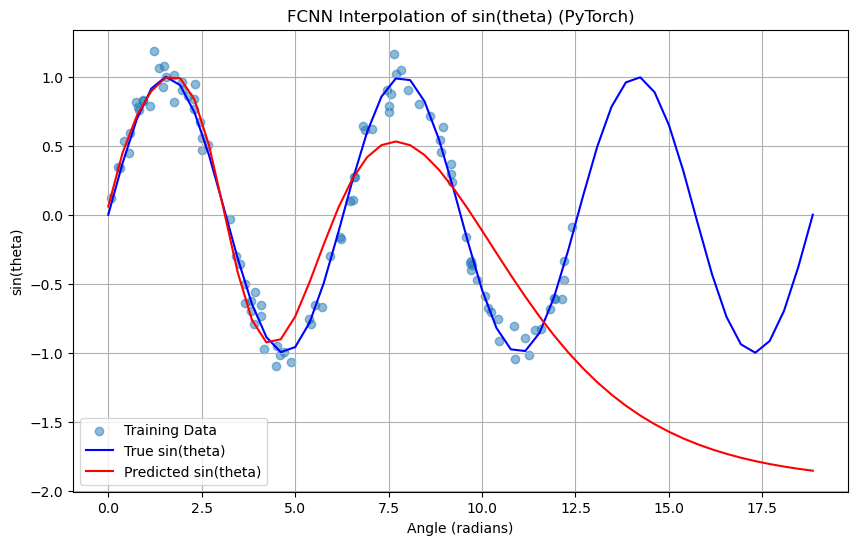

In [7]:
#Avaliando o moledo em PyTorch
criterion_eval = nn.MSELoss()
mse_tensor = criterion_eval(sin_values_predicted, sin_values_true)
mse = mse_tensor.item()
print(f"Mean Squared Error on Test Data (PyTorch): {mse}")

#Visualização dos resultados
plt.figure(figsize=(10, 6))
plt.scatter(angles_train_np, sin_values_train_np, label='Training Data', alpha=0.5)
plt.plot(angles_test_np, sin_values_true_np, label='True sin(theta)', color='blue')
plt.plot(angles_test_np, sin_values_predicted.numpy(), label='Predicted sin(theta)', color='red')
plt.xlabel('Angle (radians)')
plt.ylabel('sin(theta)')
plt.title('FCNN Interpolation of sin(theta) (PyTorch)')
plt.legend()
plt.grid(True)
plt.show()